## [Kadensky](https://huggingface.co/kandinsky-community/kandinsky-2-2-decoder)

### Check for CUDA/MPS Device

In [2]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
    print ("CUDA & MPS devices not found.")

print("Testing torch device")
torch.ones(2, device=device) 

Testing torch device


tensor([1., 1.], device='mps:0')

## Loading pipeline

In [3]:
from diffusers import AutoPipelineForText2Image

pipe = AutoPipelineForText2Image.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder",
    torch_dtype=torch.float16
).to(device)

movq/config.json: 100%|██████████| 660/660 [00:00<00:00, 458kB/s]
README.md: 100%|██████████| 7.34k/7.34k [00:00<00:00, 14.0MB/s]
unet/config.json: 100%|██████████| 1.67k/1.67k [00:00<00:00, 8.05MB/s]
scheduler/scheduler_config.json: 100%|██████████| 317/317 [00:00<00:00, 1.29MB/s]



























diffusion_pytorch_model.safetensors: 100%|██████████| 271M/271M [00:19<00:00, 14.2MB/s]
diffusion_pytorch_model.safetensors: 100%|██████████| 5.01G/5.01G [03:13<00:00, 26.0MB/s]
Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]














prior/config.json: 100%|██████████| 252/252 [00:00<00:00, 77.9kB/s]
text_encoder/config.json: 100%|██████████| 2.02k/2.02k [00:00<00:00, 798kB/s]



image_processor/preprocessor_config.json: 100%|██████████| 315/315 [00:00<00:00, 1.12MB/s]



image_encoder/config.json: 100%|██████████| 2.01k/2.01k [00:00<00:00, 7.93MB/s]
Fetching 13 files:   8%|▊         | 1/13 [00:00<00:09,  1.27it/s]











tokenizer/special_tokens_map.json: 100%|

In [12]:
prompt = """
Design a stylized version of the Om symbol that can be used as a logo or icon for a spiritual organization or event, conveying its
message of unity and enlightenment.
"""
negative_prompt = "low quality, bad quality, nsfw, hands, artefacts"
guidance_scale = 8
output_count = 2
num_inference_steps = 50

images = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    prior_guidance_scale =1.0,
    guidance_scale=guidance_scale,
    num_images_per_prompt=output_count,
    num_inference_steps=num_inference_steps,
    height=768,
    width=608
).images

100%|██████████| 25/25 [00:14<00:00,  1.75it/s]
/Users/captain2mac/Documents/Code/HuggingFace/.venv/lib/python3.9/site-packages/diffusers/pipelines/kandinsky2_2/pipeline_kandinsky2_2.py:202: FutureWarning: `callback_steps` is deprecated and will be removed in version 1.0.0. Passing `callback_steps` as an input argument to `__call__` is deprecated, consider use `callback_on_step_end`
  deprecate(
100%|██████████| 50/50 [01:29<00:00,  1.80s/it]


In [28]:
from diffusers import AutoPipelineForImage2Image

pipe = AutoPipelineForImage2Image.from_pretrained("kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16).to(device)

Loading pipeline components...: 100%|██████████| 6/6 [00:07<00:00,  1.29s/it]


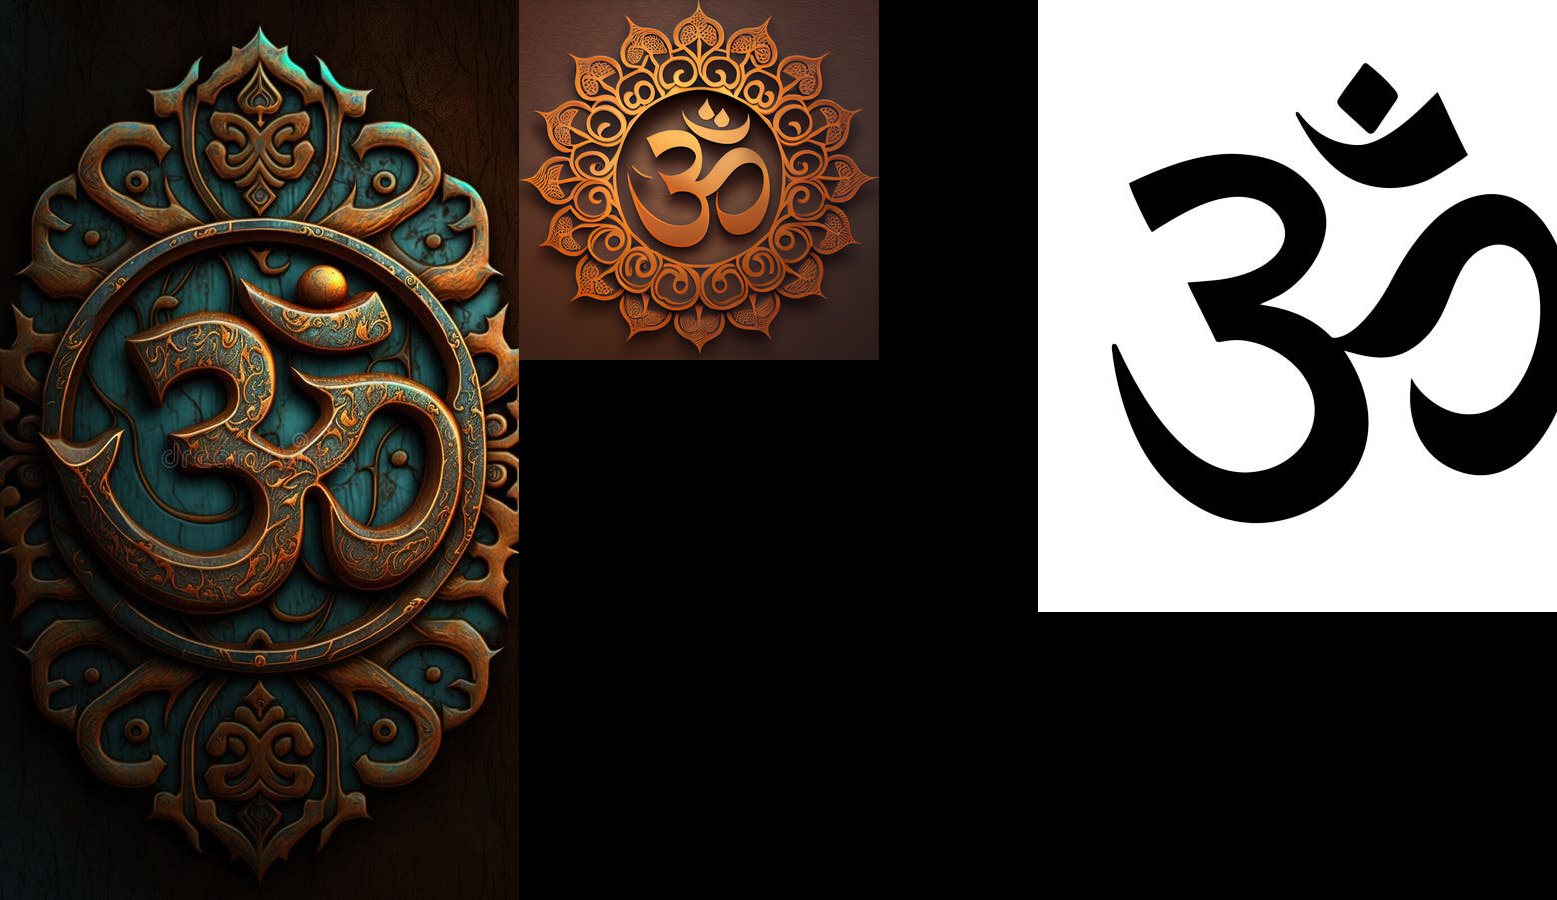

In [32]:
from diffusers.utils import load_image, make_image_grid
from PIL import Image

om1 = load_image("https://thumbs.dreamstime.com/b/om-symbol-hindu-images-beautiful-artwork-generative-ai-art-created-technology-image-269052253.jpg")
om2 = Image.open("../input/360_F_544917922_iQyORBFVVwV9z6e3DPv7W9zrqVT4Mhxo.jpg")
om_logo = load_image("https://media.istockphoto.com/id/1317442533/vector/ohm-symbol-isolated-on-white-background.jpg?s=612x612&w=0&k=20&c=VWXV8gtl-F71o5kpaKTh7Rpn3ESrSrYHJaH6Y0B7cYU=")

make_image_grid([om1, om2, om_logo], rows=1, cols=3)

Prompts:
1. "Create an image of the Hindu symbol Om with intricate details and a stylized design."
2. "Generate a digital representation of the Hindu mantra Om, incorporating its spiritual significance and cultural importance."
3. "Design an Om symbol that embodies the cosmic energy and harmony of the universe, using vibrant colors and organic shapes."
4. "Create an Om-inspired artwork that blends traditional Indian motifs with modern digital techniques, such as 3D modeling and 
texturing."
5. "Design a stylized version of the Om symbol that can be used as a logo or icon for a spiritual organization or event, conveying its
message of unity and enlightenment."
6. "Generate an image of the Hindu symbol Om with a unique perspective, such as a 360-degree panoramic view or a kinetic art piece 
that changes shape and form."
7. "Design an Om-inspired installation that incorporates light, sound, and movement to create an immersive experience for viewers."
8. "Create a digital collage of the Hindu symbol Om, combining it with other elements such as nature, architecture, or abstract shapes
to create a visually striking image."
9. "Generate an image of the Hindu symbol Om that reflects its spiritual significance and cultural importance, using traditional 
Indian art forms such as mandalas or henna designs."
10. "Design an Om-inspired digital art piece that blends Eastern and Western aesthetics, incorporating elements of both cultures to 
create a unique and harmonious image."

In [33]:
prompt="""Design a stylized version of the Om symbol that can be used as a logo or icon for a spiritual organization or event, conveying its
message of unity and enlightenment."""
negative_prompt = "low quality, bad quality, nsfw, hands, artefacts"
guidance_scale = 8
output_count = 4
strenght = 1
num_inference_steps = 50

images = pipe(
    prompt=prompt,
    image=om_logo,
    strength=strenght,
    num_inference_steps=num_inference_steps,
    num_images_per_prompt=output_count,
    height=768,
    width=768
).images

100%|██████████| 25/25 [00:15<00:00,  1.57it/s]
/Users/captain2mac/Documents/Code/HuggingFace/.venv/lib/python3.9/site-packages/diffusers/pipelines/kandinsky2_2/pipeline_kandinsky2_2_img2img.py:276: FutureWarning: `callback_steps` is deprecated and will be removed in version 1.0.0. Passing `callback_steps` as an input argument to `__call__` is deprecated, consider use `callback_on_step_end`
  deprecate(
100%|██████████| 50/50 [03:40<00:00,  4.41s/it]


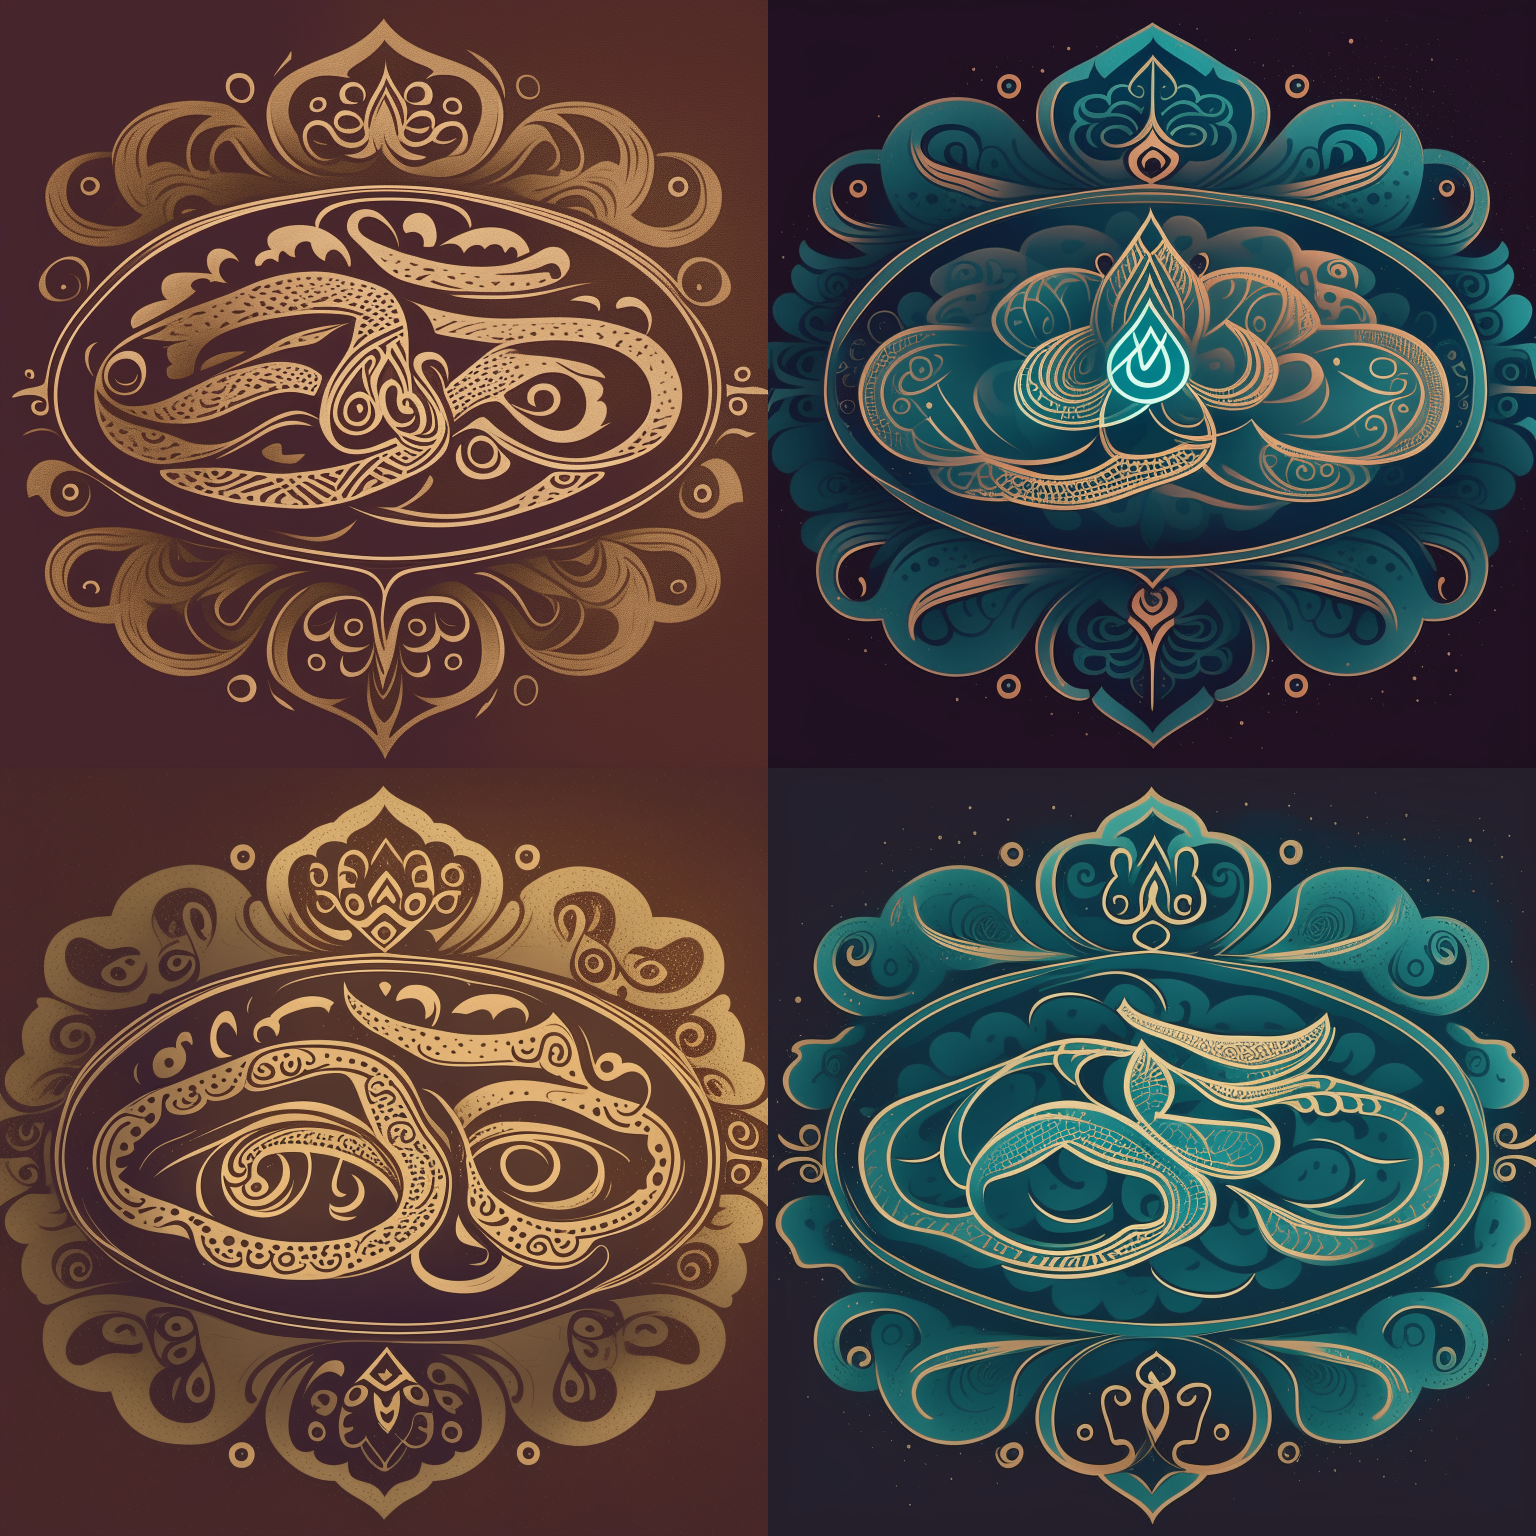

In [31]:
make_image_grid(images=images, rows=2, cols=2)